# Some supplementary figures and tables

### Concerning: location of IBD inference, if allele frequency is known

Note that the data is not available in this repo, so the `pd.read_csv()` will throw an error. 

To reproduce, you can create the data following the pipelines.

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',size=14)

## Loading in and manipulating data

There is some sloppy code, but the goal is:
- Subset to have an equal bin sizes of (selection coefficient, allele frequency bin)

There may be some small intricacies where a few rows have NA's, so addressing those.

In [93]:
table = pd.read_csv('fixed.loc.final.tsv',sep='\t',header=None)
table.columns = ['true_frequency',
                 'assumed_frequency',
                 'mid_est',
                 'low_est',
                 'upp_est',
                 'model',
                 'method',
                 'length',
                 'selcoef'
                ]
print(table.shape)
table = table[table['assumed_frequency']!='.']
print(table.shape)
table.head()

(7089, 9)
(7080, 9)


,true_frequency,assumed_frequency,mid_est,low_est,upp_est,model,method,length,selcoef
0,0.1005,0.125,0.03245165804352287,0.025931802922161077,0.03897151316488466,a,infloc,3.0,0.035
1,0.3122,0.275,0.03638904347121853,0.03109740764830634,0.041680679294130725,a,infloc,3.0,0.035
2,0.4744,0.425,0.03489430879704939,0.030570202070689733,0.039218415523409045,a,infloc,3.0,0.035
3,0.1623,0.125,0.04245499479702876,0.034082684713699116,0.0508273048803584,a,infloc,3.0,0.035
4,0.2328,0.2,0.036148625343145974,0.03016169298028552,0.04213555770600643,a,infloc,3.0,0.035


In [94]:
subtable1 = table[table['method']=='infloc']
subtable2 = table[(table['method']=='trueloc')&(table['length']==3.0)]
subtable3 = table[(table['method']=='trueloc')&(table['length']==2.0)]
subtable4 = table[(table['method']=='trueloc')&(table['length']==1.0)]

numcolumns = ['true_frequency','assumed_frequency','mid_est','low_est','upp_est','length','selcoef']
for col in numcolumns:
    subtable1[col] = subtable1[col].astype(float)
    subtable2[col] = subtable2[col].astype(float)
    subtable3[col] = subtable3[col].astype(float)
    subtable4[col] = subtable4[col].astype(float)

subtable1.shape,subtable2.shape,subtable3.shape,subtable4.shape

/tmp/ipykernel_73329/2691425677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable1[col] = subtable1[col].astype(float)
/tmp/ipykernel_73329/2691425677.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable2[col] = subtable2[col].astype(float)
/tmp/ipykernel_73329/2691425677.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

((1760, 9), (1771, 9), (1770, 9), (1771, 9))

In [95]:
binvalues=[0.1,0.3,0.5,0.7,0.9]
subtable1['freqbins'] = pd.cut(subtable1['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
pd.cut(subtable1['true_frequency'],bins=binvalues).value_counts()

/tmp/ipykernel_73329/172417151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable1['freqbins'] = pd.cut(subtable1['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])


true_frequency
(0.1, 0.3]    647
(0.3, 0.5]    425
(0.7, 0.9]    364
(0.5, 0.7]    324
Name: count, dtype: int64

In [96]:
subtable2['freqbins'] = pd.cut(subtable2['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
subtable3['freqbins'] = pd.cut(subtable3['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
subtable4['freqbins'] = pd.cut(subtable4['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])

/tmp/ipykernel_73329/2862350317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable2['freqbins'] = pd.cut(subtable2['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
/tmp/ipykernel_73329/2862350317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtable3['freqbins'] = pd.cut(subtable3['true_frequency'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
/tmp/ipykernel_73329/2862350317.py:3: SettingWithCopyWarning: 
A value i

In [97]:
mx1 = 50
mx2 = 40
freqlabels = ['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]']
selcoeflabels = [0.015,0.02,0.025,0.03,0.035,0.04]

tups1 = [('(0.1, 0.3]',s) for s in selcoeflabels]
tups2 = [('(0.3, 0.5]',s) for s in selcoeflabels]
tups3 = [('(0.5, 0.7]',s) for s in selcoeflabels]
tups4 = [('(0.7, 0.9]',s) for s in selcoeflabels]
tups = tups1 + tups2 + tups3 + tups4

In [98]:
# first subtable
first = tups[0]
temptable = subtable1
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable1 = reducedtable

# second subtable
first = tups[0]
temptable = subtable2
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable2 = reducedtable

# third subtable
first = tups[0]
temptable = subtable3
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable3 = reducedtable

# fourth subtable
first = tups[0]
temptable = subtable4
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable4 = reducedtable

In [42]:
table3 = pd.concat((reducedtable1,reducedtable2))
table321 = pd.concat((reducedtable2,reducedtable3,reducedtable4))

table3['method'] = table3['method'].replace('trueloc', 'True frequency, location')
table3['method'] = table3['method'].replace('infloc', 'Inferred frequency, location')


table321['method'] = table321['method'].replace('trueloc', 'True frequency, location')
table321['method'] = table321['method'].replace('infloc', 'Inferred frequency, location')

table3.head()

,index,true_frequency,assumed_frequency,mid_est,low_est,upp_est,model,method,length,selcoef,freqbins
0,400,0.1068,0.125,0.024569,0.011847,0.037291,a,"Inferred frequency, location",3.0,0.02,"(0.1, 0.3]"
1,401,0.1464,0.100,0.027699,0.017705,0.037693,a,"Inferred frequency, location",3.0,0.02,"(0.1, 0.3]"
2,402,0.1102,0.125,0.023801,0.015003,0.032599,a,"Inferred frequency, location",3.0,0.02,"(0.1, 0.3]"
3,403,0.1326,0.150,0.025209,0.017070,0.033347,a,"Inferred frequency, location",3.0,0.02,"(0.1, 0.3]"
4,404,0.1123,0.125,0.019161,0.007162,0.031160,a,"Inferred frequency, location",3.0,0.02,"(0.1, 0.3]"


## Plotting the results

Some of these figures appear in the supplementary material.

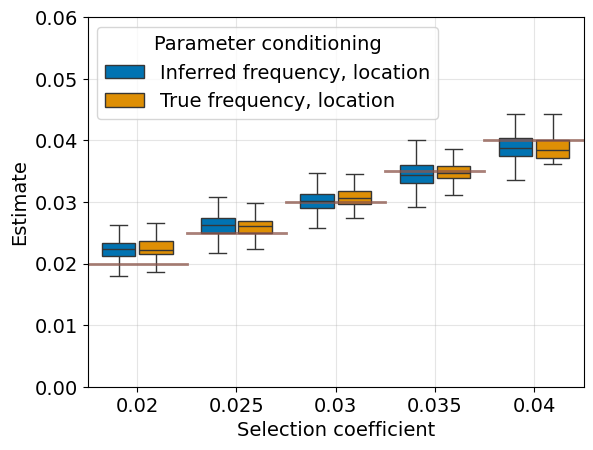

In [44]:
sns.boxplot(table3,
            x='selcoef',
            y='mid_est',
            hue='method',
            palette='colorblind',
            showfliers=False,
            gap=0.1,
            width=0.75,
            saturation=3.
           )
plt.ylim(0.0,0.06)
plt.grid(alpha=0.33)
plt.xlabel('Selection coefficient')
plt.ylabel('Estimate')
plt.legend(title='Parameter conditioning')

# plt.axhline(0.03,0.51,0.67,linestyle='dotted',color='tab:green',linewidth=3)
plt.axhline(0.035,0.6,0.8,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.04,0.8,1.,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.03,0.4,0.6,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.025,0.2,0.4,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.02,0.,0.2,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)

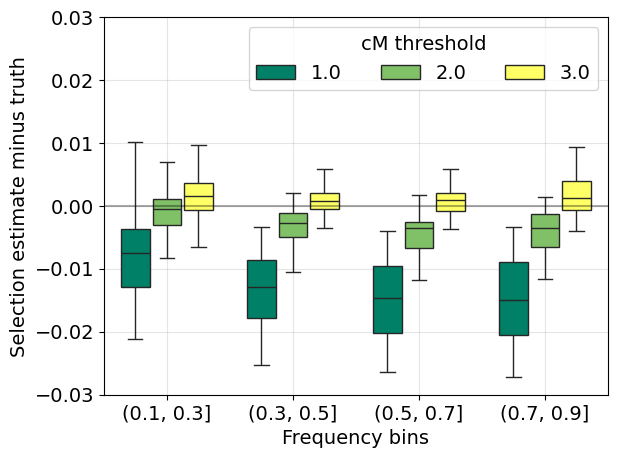

In [26]:
table321['diff'] = table321['mid_est'] - table321['selcoef']
sns.boxplot(table321,
            x='freqbins',
            y='diff',
            hue='length',
            palette='summer',
            showfliers=False,
            gap=0.1,
            width=0.75,
            saturation=2.
           )
plt.ylim(-0.03,0.03)
plt.grid(alpha=0.33)
plt.xlabel('Frequency bins')
plt.ylabel('Selection estimate minus truth')
plt.legend(title='cM threshold',
           ncol=3,
          )

plt.axhline(0,color='k',alpha=0.33)

plt.tight_layout()

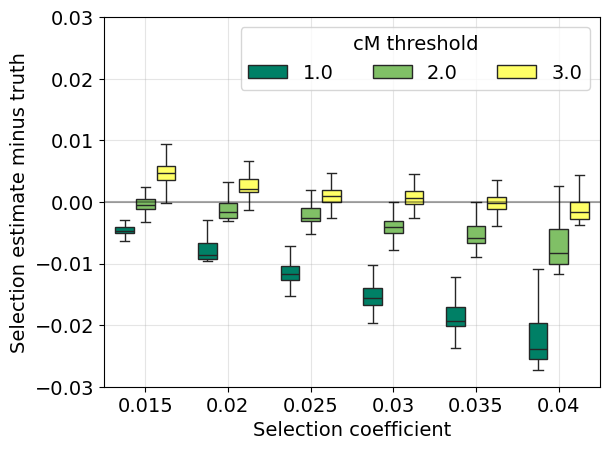

In [27]:
table321['diff'] = table321['mid_est'] - table321['selcoef']
sns.boxplot(table321,
            x='selcoef',
            y='diff',
            hue='length',
            palette='summer',
            showfliers=False,
            gap=0.1,
            width=0.75,
            saturation=2.
           )
plt.ylim(-0.03,0.03)
plt.grid(alpha=0.33)
plt.xlabel('Selection coefficient')
plt.ylabel('Selection estimate minus truth')
plt.legend(title='cM threshold',
           ncol=3,
          )

plt.axhline(0,color='k',alpha=0.33)

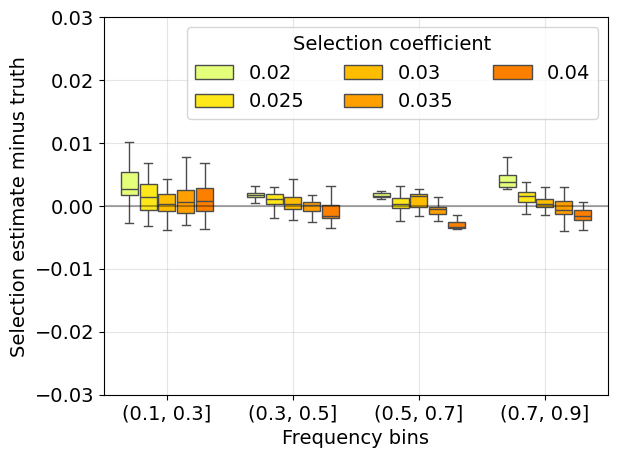

In [46]:
table321['diff'] = table321['mid_est'] - table321['selcoef']
subtable321 = table321[table321['length']==3.]
sns.boxplot(subtable321,
            x='freqbins',
            y='diff',
            hue='selcoef',
            palette='Wistia',
            showfliers=False,
            gap=0.1,
            width=0.75,
            saturation=2.
           )
plt.ylim(-0.03,0.03)
plt.grid(alpha=0.33)
plt.xlabel('Frequency bins')
# plt.xticks(fontsize=12)
plt.ylabel('Selection estimate minus truth')
plt.legend(title='Selection coefficient',
           ncol=3,
          )

plt.axhline(0,color='k',alpha=0.33)

plt.tight_layout()

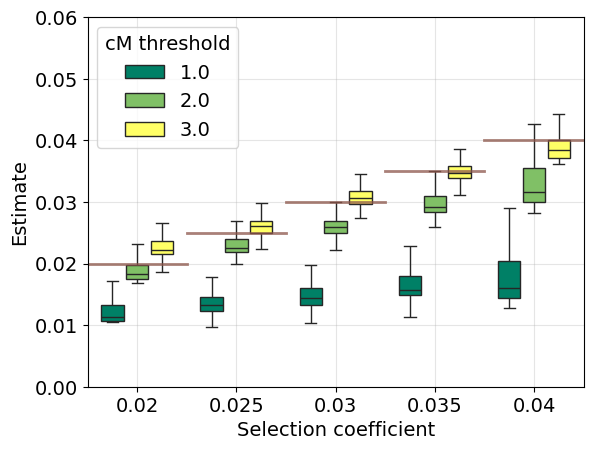

In [48]:
sns.boxplot(table321,
            x='selcoef',
            y='mid_est',
            hue='length',
            palette='summer',
            showfliers=False,
            gap=0.1,
            width=0.75,
            saturation=2.
           )
plt.ylim(0.0,0.06)
plt.grid(alpha=0.33)
plt.xlabel('Selection coefficient')
plt.ylabel('Estimate')
plt.legend(title='cM threshold')

# plt.axhline(0.03,0.51,0.67,linestyle='dotted',color='tab:green',linewidth=3)
plt.axhline(0.035,0.6,0.8,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.04,0.8,1.,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.03,0.4,0.6,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.025,0.2,0.4,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)
plt.axhline(0.02,0.,0.2,linestyle='solid',color='tab:brown',linewidth=2,alpha=0.75)

## Making tables

In [202]:
tabletable = table3[table3['method']=='True frequency, location']
tabletable['covered'] = (tabletable['low_est'] <= tabletable['selcoef']) & (tabletable['upp_est'] >= tabletable['selcoef'])
tabletable['width'] = tabletable['upp_est'] - tabletable['low_est']

/tmp/ipykernel_59707/983296887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabletable['covered'] = (tabletable['low_est'] <= tabletable['selcoef']) & (tabletable['upp_est'] >= tabletable['selcoef'])
/tmp/ipykernel_59707/983296887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabletable['width'] = tabletable['upp_est'] - tabletable['low_est']


In [6]:
subtable=table.dropna()
subtable.shape[0]

1394

In [8]:
core = [0,1,3]
sub1 = [2,4,5,6] + core
sub2 = [8,10,11,12] + core
sub3 = [14,16,17,18] + core

In [14]:
subtable1 = subtable[sub1]
subtable2 = subtable[sub2]
subtable3 = subtable[sub3]
subtable1.columns= [i for i in range(7)]
subtable2.columns= [i for i in range(7)]
subtable3.columns= [i for i in range(7)]
subtable1.shape,subtable2.shape,subtable3.shape

((1394, 7), (1394, 7), (1394, 7))

In [28]:
finaltable = pd.concat((subtable1,subtable2,subtable3))
finaltable.columns = ['cm','est','low','upp','selcoef','time','freq']
finalsubtable = finaltable[finaltable['selcoef'].isin([0.01,0.02,0.03,0.04])]

In [29]:
finaltable.head()

,cm,est,low,upp,selcoef,time,freq
0,1.0,0.029091,0.018059,0.040124,0.04,200,0.1891
1,1.0,0.035350,0.01959,0.051110,0.04,200,0.1330
2,1.0,0.025259,0.014967,0.035552,0.04,200,0.2272
3,1.0,0.026730,0.015308,0.038152,0.04,200,0.1265
4,1.0,0.025557,0.013414,0.037699,0.04,200,0.2021


### The detection threshold is cM 3.0

In [62]:
covtable = finaltable[finaltable['cm']==3.0]
covtable = covtable.astype('float')
covtable['diff'] = covtable['est'] - covtable['selcoef']
covtable['absdiff'] = covtable['diff'].abs()
covtable['covered'] = (covtable['low']<=covtable['selcoef'])&(covtable['upp']>=covtable['selcoef'])
covtable['width'] = covtable['upp'] - covtable['low']
covtable.tail()

,cm,est,low,upp,selcoef,time,freq,diff,absdiff,covered,width
1395,3.0,0.016480,0.010303,0.022656,0.015,375.0,0.3488,0.001480,0.001480,True,0.012353
1396,3.0,0.020308,0.013591,0.027024,0.015,375.0,0.1927,0.005308,0.005308,True,0.013433
1397,3.0,0.022759,0.013420,0.032098,0.015,375.0,0.1312,0.007759,0.007759,True,0.018678
1398,3.0,0.014744,0.002333,0.027155,0.015,375.0,0.1718,-0.000256,0.000256,True,0.024822
1399,3.0,0.009693,-0.000422,0.019808,0.015,375.0,0.3176,-0.005307,0.005307,True,0.020229


In [54]:
covtable.groupby(['selcoef','time'])['est'].mean()

selcoef  time
0.010    350     0.014858
         400     0.014742
0.015    325     0.017166
         375     0.017690
0.020    250     0.022909
         300     0.021692
0.025    275     0.026180
         325     0.026083
0.030    250     0.030388
         300     0.030510
0.035    225     0.035839
         275     0.034522
0.040    200     0.040952
         250     0.039130
Name: est, dtype: float64

In [55]:
covtable.groupby(['selcoef','time'])['absdiff'].mean()

selcoef  time
0.010    350     0.006254
         400     0.006414
0.015    325     0.004293
         375     0.003769
0.020    250     0.003575
         300     0.002238
0.025    275     0.001870
         325     0.001476
0.030    250     0.001425
         300     0.001110
0.035    225     0.001798
         275     0.001216
0.040    200     0.002084
         250     0.001711
Name: absdiff, dtype: float64

In [61]:
covtable.groupby(['selcoef','time'])['covered'].mean()

selcoef  time 
0.010    350.0    0.854167
         400.0    0.808081
0.015    325.0    0.870000
         375.0    0.828283
0.020    250.0    0.880000
         300.0    0.910000
0.025    275.0    0.990000
         325.0    0.980000
0.030    250.0    1.000000
         300.0    0.990000
0.035    225.0    0.970000
         275.0    0.990000
0.040    200.0    1.000000
         250.0    0.980000
Name: covered, dtype: float64

In [63]:
covtable.groupby(['selcoef','time'])['width'].mean()

selcoef  time 
0.010    350.0    0.024166
         400.0    0.022209
0.015    325.0    0.019615
         375.0    0.015980
0.020    250.0    0.018798
         300.0    0.013212
0.025    275.0    0.009010
         325.0    0.006759
0.030    250.0    0.009220
         300.0    0.006772
0.035    225.0    0.011105
         275.0    0.007623
0.040    200.0    0.013808
         250.0    0.009381
Name: width, dtype: float64

### The detection threshold is cM 2.0

In [64]:
covtable2 = finaltable[finaltable['cm']==2.0]
covtable2 = covtable2.astype('float')
covtable2['diff'] = covtable2['est'] - covtable2['selcoef']
covtable2['absdiff'] = covtable2['diff'].abs()
covtable2['covered'] = (covtable2['low']<=covtable2['selcoef'])&(covtable2['upp']>=covtable2['selcoef'])
covtable2['width'] = covtable2['upp'] - covtable2['low']
covtable2.tail()

,cm,est,low,upp,selcoef,time,freq,diff,absdiff,covered,width
1395,2.0,0.016709,0.013562,0.019855,0.015,375.0,0.3488,0.001709,0.001709,True,0.006293
1396,2.0,0.016382,0.012643,0.020120,0.015,375.0,0.1927,0.001382,0.001382,True,0.007477
1397,2.0,0.016884,0.013021,0.020748,0.015,375.0,0.1312,0.001884,0.001884,True,0.007727
1398,2.0,0.014555,0.010758,0.018352,0.015,375.0,0.1718,-0.000445,0.000445,True,0.007593
1399,2.0,0.014153,0.011614,0.016691,0.015,375.0,0.3176,-0.000847,0.000847,True,0.005077


In [65]:
covtable2.groupby(['selcoef','time'])['est'].mean()

selcoef  time 
0.010    350.0    0.012209
         400.0    0.011958
0.015    325.0    0.015321
         375.0    0.015087
0.020    250.0    0.022059
         300.0    0.019661
0.025    275.0    0.023972
         325.0    0.022347
0.030    250.0    0.027040
         300.0    0.025741
0.035    225.0    0.032307
         275.0    0.028879
0.040    200.0    0.038002
         250.0    0.032573
Name: est, dtype: float64

In [66]:
covtable2.groupby(['selcoef','time'])['absdiff'].mean()

selcoef  time 
0.010    350.0    0.002418
         400.0    0.002082
0.015    325.0    0.001126
         375.0    0.001070
0.020    250.0    0.002620
         300.0    0.001271
0.025    275.0    0.002021
         325.0    0.002868
0.030    250.0    0.003373
         300.0    0.004284
0.035    225.0    0.003479
         275.0    0.006121
0.040    200.0    0.003475
         250.0    0.007516
Name: absdiff, dtype: float64

In [67]:
covtable2.groupby(['selcoef','time'])['covered'].mean()

selcoef  time 
0.010    350.0    0.864583
         400.0    0.909091
0.015    325.0    1.000000
         375.0    0.989899
0.020    250.0    0.950000
         300.0    0.980000
0.025    275.0    0.960000
         325.0    0.640000
0.030    250.0    0.820000
         300.0    0.440000
0.035    225.0    0.900000
         275.0    0.270000
0.040    200.0    0.970000
         250.0    0.220000
Name: covered, dtype: float64

In [68]:
covtable2.groupby(['selcoef','time'])['width'].mean()

selcoef  time 
0.010    350.0    0.008799
         400.0    0.007592
0.015    325.0    0.007968
         375.0    0.006845
0.020    250.0    0.011418
         300.0    0.008865
0.025    275.0    0.010460
         325.0    0.007532
0.030    250.0    0.011682
         300.0    0.008694
0.035    225.0    0.014758
         275.0    0.010259
0.040    200.0    0.018205
         250.0    0.011948
Name: width, dtype: float64